In [50]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
class_test_im = np.loadtxt('./csv/class_test_im.csv', delimiter=',')
class_test_lb = np.loadtxt('./csv/class_test_lb.csv', delimiter=',')
class_train_im = np.array(pd.read_csv('./csv/class_train_im.csv', header=None))
class_train_lb = np.loadtxt('./csv/class_train_lb.csv', delimiter=',')

In [14]:
bal_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f',
    41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

class_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e',
    41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o',
    51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
    61: 'z'
}

### Reducción de dimensionalidad / graficar

#### PCA

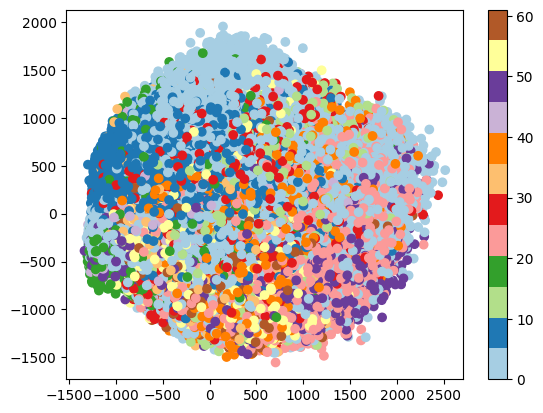

In [3]:
pca = PCA(n_components=2)
proj = pca.fit_transform(np.concatenate((class_train_im, class_test_im)))
plt.scatter(proj[:, 0], proj[:, 1], c=np.concatenate((class_train_lb, class_test_lb)), cmap="Paired")
plt.colorbar()

#### Sparse random projection

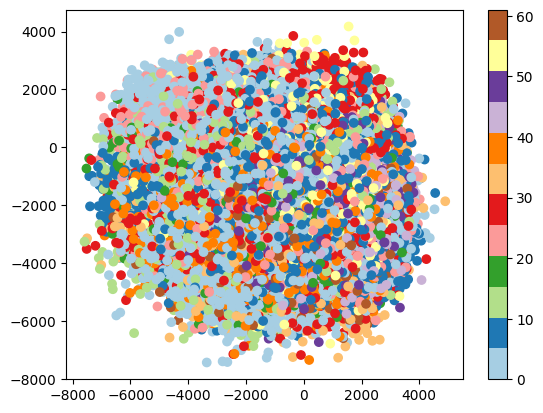

In [4]:
from sklearn import random_projection as rp
from sklearn.cluster import FeatureAgglomeration

plt.figure()

s_ran = rp.SparseRandomProjection(n_components=2)
proj_s_ran = s_ran.fit_transform(np.concatenate((class_train_im, class_test_im)))
plt.scatter(proj_s_ran[:, 0], proj_s_ran[:, 1], c=np.concatenate((class_train_lb, class_test_lb)), cmap="Paired")
plt.colorbar()

#### Gaussian random projection

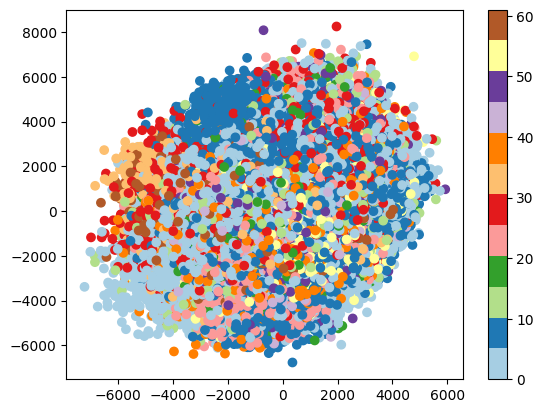

In [5]:
plt.figure()

g_ran = rp.GaussianRandomProjection(n_components=2)
proj_g_ran = g_ran.fit_transform(np.concatenate((class_train_im, class_test_im)))
plt.scatter(proj_g_ran[:, 0], proj_g_ran[:, 1], c=np.concatenate((class_train_lb, class_test_lb)), cmap="Paired")
plt.colorbar()

#### Feature agglomeration

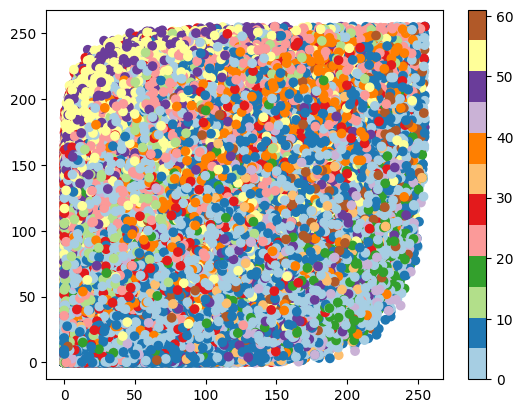

In [6]:
plt.figure()

fa = FeatureAgglomeration(n_clusters=10)
proj_fa = fa.fit_transform(np.concatenate((class_train_im, class_test_im)))
plt.scatter(proj_fa[:, 0], proj_fa[:, 1], c=np.concatenate((class_train_lb, class_test_lb)), cmap="Paired")
plt.colorbar()

### Clasificar

#### Gaussian Naive Bayes

In [7]:
clf = GaussianNB()
clf.fit(class_train_im, class_train_lb)

predicted = clf.predict(class_test_im)
expected = class_test_lb

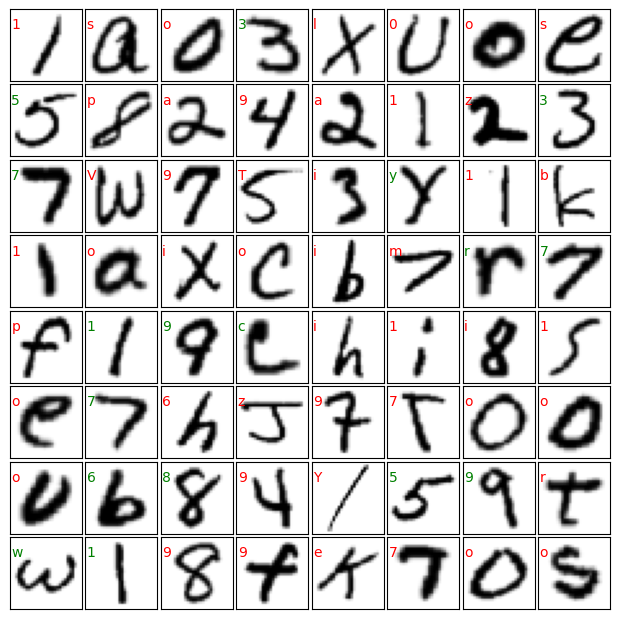

In [16]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(class_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, class_mapa[predicted[i]], color='green')
    else:
        ax.text(0, 7, class_mapa[predicted[i]], color='red')

In [56]:
df_reportNB = pd.DataFrame(metrics.classification_report(expected, predicted, output_dict=True)).transpose()
df_reportNB.index = list(class_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportNB.to_csv('reportNB.csv', index=True)
df_reportNB

,precision,recall,f1-score,support
0,0.547108,0.203011,0.296137,5778.000000
1,0.471447,0.939021,0.627733,6330.000000
2,0.875135,0.138524,0.239188,5869.000000
3,0.836975,0.417155,0.556798,5969.000000
4,0.827027,0.027229,0.052722,5619.000000
...,...,...,...,...
y,0.079452,0.076115,0.077748,381.000000
z,0.120235,0.363636,0.180716,451.000000
accuracy,0.295969,0.295969,0.295969,0.295969
macro avg,0.356543,0.256226,0.207648,116323.000000


In [57]:
conf_matrixNB = metrics.confusion_matrix(y_true=expected, y_pred=predicted)

df_confNB = pd.DataFrame(conf_matrixNB, index=list(class_mapa.values()), columns=list(class_mapa.values()))
df_confNB.to_csv('conf_matrixNB.csv', index=True)

#### K-Vecinos cercanos

In [11]:
clf_KN = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf_KN.fit(class_train_im, class_train_lb)

predictedKN = clf_KN.predict(class_test_im)
expectedKN = class_test_lb

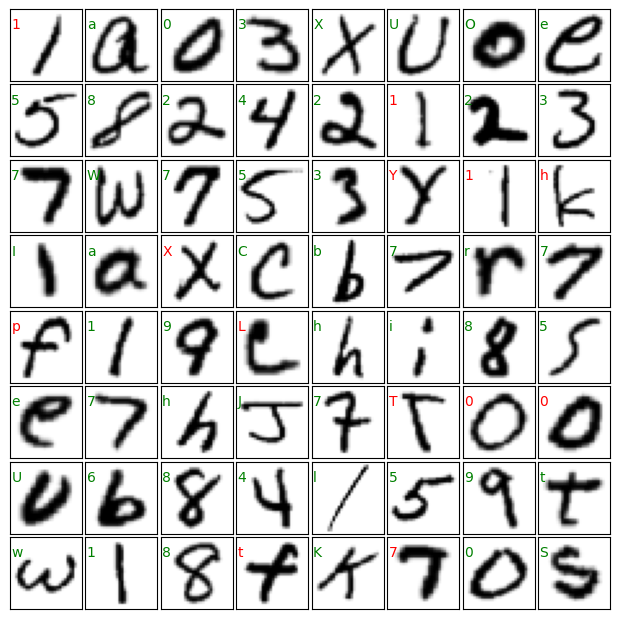

In [31]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(class_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedKN[i] == expectedKN[i]:
        ax.text(0, 7, class_mapa[predictedKN[i]], color='green')
    else:
        ax.text(0, 7, class_mapa[predictedKN[i]], color='red')

In [58]:
df_reportKN = pd.DataFrame(metrics.classification_report(expectedKN, predictedKN, output_dict=True)).transpose()
df_reportKN.index = list(class_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportKN.to_csv('reportKN.csv', index=True)
df_reportKN

,precision,recall,f1-score,support
0,0.630402,0.795258,0.703298,5778.000000
1,0.617347,0.898420,0.731823,6330.000000
2,0.910535,0.957233,0.933300,5869.000000
3,0.946747,0.979896,0.963036,5969.000000
4,0.917428,0.947144,0.932049,5619.000000
...,...,...,...,...
y,0.391061,0.183727,0.250000,381.000000
z,0.584967,0.396896,0.472919,451.000000
accuracy,0.813605,0.813605,0.813605,0.813605
macro avg,0.728410,0.628219,0.648981,116323.000000


In [60]:
conf_matrixKN = metrics.confusion_matrix(y_true=expectedKN, y_pred=predictedKN)

df_confKN = pd.DataFrame(conf_matrixKN, index=list(class_mapa.values()), columns=list(class_mapa.values()))
df_confKN.to_csv('conf_matrixKN.csv', index=True)

### Multi-layer perceptron (red neuronal)

In [61]:
clf_NN = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=2000)
clf_NN.fit(class_train_im, class_train_lb)

predictedNN = clf_NN.predict(class_test_im)
expectedNN = class_test_lb

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(class_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedNN[i] == expectedNN[i]:
        ax.text(0, 7, class_mapa[predictedNN[i]], color='green')
    else:
        ax.text(0, 7, class_mapa[predictedNN[i]], color='red')

In [ ]:
df_reportNN = pd.DataFrame(metrics.classification_report(expectedNN, predictedNN, output_dict=True)).transpose()
df_reportNN.index = list(class_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportNN.to_csv('reportNN.csv', index=True)
df_reportNN

In [ ]:
conf_matrixNN = metrics.confusion_matrix(y_true=expectedNN, y_pred=predictedNN)

df_confNN = pd.DataFrame(conf_matrixNN, index=list(class_mapa.values()), columns=list(class_mapa.values()))
df_confNN.to_csv('conf_matrixNN.csv', index=True)